# Perform evaluation on the data

## assumptions 
The data will be returns an 1-dimension tensor (array) of the predictions for all the test images. 
This could then be compared against the labels to calculate the error 

In [1]:
import torch
import torchvision
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Dummy Training Output: tensor([ 2, 22, 10,  6, 17, 23, 10, 27, 27, 17,  3, 22, 28, 26,  6, 26, 26, 18,
        23,  4, 16, 22, 17,  4,  2, 24, 19, 20,  1, 26])
Dummy Training Expected: tensor([ 2, 22, 10,  6, 17, 23, 10, 27, 27, 17,  3, 22, 28, 26,  6, 28, 26, 18,
        23,  4, 16, 22, 17,  4,  1, 24, 19, 19,  1, 26])


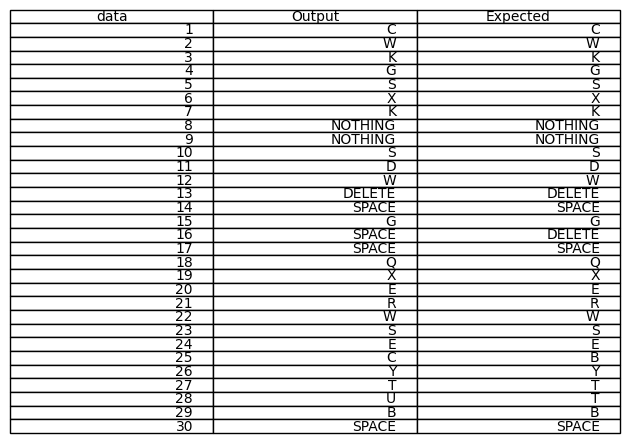

Dummy Testing Output: tensor([15, 20, 19,  8, 16, 27,  9, 14,  3, 23, 28, 24, 28,  8,  3, 10, 26, 21,
         7,  8])
Dummy Testing Expected: tensor([16, 20, 19,  9, 16, 27,  9, 14,  3, 23, 28, 24, 28,  8,  3, 10, 26, 21,
         7,  8])


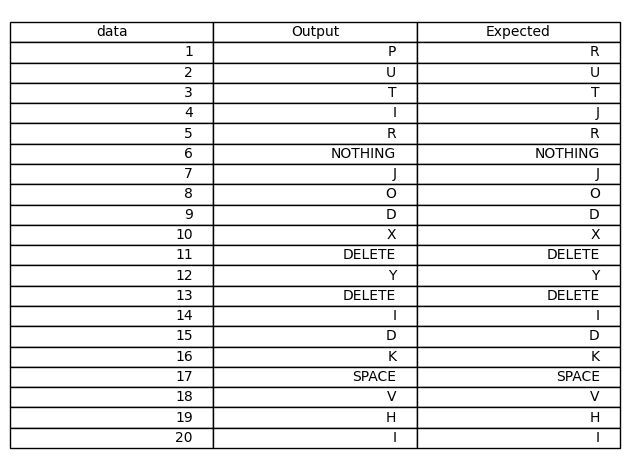

In [30]:
# usefull variables for the entire thing 
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "R", "S",
             "Q", "T", "U", "V", "W", "X", "Y", "Z", "SPACE", "NOTHING", "DELETE"]

# Created Some Dummy output and expected data
amount_of_training_data = 30
amount_of_testing_data = 20

training_expected = torch.randint(0, 29, (amount_of_training_data,))
testing_expected = torch.randint(0, 29, (amount_of_testing_data,))

training_output = training_expected.clone().detach()
testing_output = testing_expected.clone().detach()

def scramble_output(output): 
    # assume that output is 1d tensor 
    n = output.shape[0]
    mask = torch.randn(output.shape[0])
    for i in range(0, n, 3):
        output[i] += (mask.int())[i]
        output[i] = min(28, output[i])

scramble_output(training_output)
scramble_output(testing_output)

## ==== print out the data in a form that's readible ==== ##
# used as a sanity check to make sure I know what I'm working with 

def display_output_vs_expected(output, expected):
    fig, ax = plt.subplots()

    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    
    output_formatted = []
    expected_formatted = []
    n = output.shape[0]
    for i in range(0, n): 
        output_formatted.append(categories[output[i]])
        expected_formatted.append(categories[expected[i]])
    
    df = pd.DataFrame({"data":list(range(1, n + 1)), "Output":output_formatted, "Expected":expected_formatted})
    
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    
    fig.tight_layout()
    
    plt.show()

print(f"Dummy Training Output: {training_output}")
print(f"Dummy Training Expected: {training_expected}")
display_output_vs_expected(training_output, training_expected)

print(f"Dummy Testing Output: {testing_output}")
print(f"Dummy Testing Expected: {testing_expected}")
display_output_vs_expected(testing_output, testing_expected)


In [31]:
# assume that both inputs are tensors
def calculate_accuracy(output, expected):
    correct_predictions = 0 
    n = output.shape[0]
    for i in range(n):
        if output[i] == expected[i]: 
            correct_predictions += 1

    return float(correct_predictions) / float(output.shape[0])

print(f"The Accuracy: {calculate_accuracy(training_output, training_expected)}")
print(f"The Accuracy: {calculate_accuracy(testing_output, testing_expected)}")

The Accuracy: 0.9
The Accuracy: 0.9


## Compare with implementation of pytorch metrics

In [32]:
from torchmetrics.classification import MulticlassF1Score

f1_scoring = MulticlassF1Score(num_classes=len(categories), average=None)

f1_scores_training = f1_scoring(training_output, training_expected)
f1_scores_testing = f1_scoring(testing_output, testing_expected)

# return the f1 scores
# format as panda frame 
f1_scores_training_formatted = pd.DataFrame({
    "Categories" : categories,
    "F1 Scores" : f1_scores_training
})
f1_scores_testing_formatted = pd.DataFrame({
    "Categories" : categories,
    "F1 Scores" : f1_scores_testing
})
print("="*60)
print("Training: ")
print("="*10)
print(f1_scores_training_formatted)
print("="*60)
print("Testing: ")
print("="*10)
print(f1_scores_testing_formatted)
print("="*60)

Training: 
   Categories  F1 Scores
0           A   0.000000
1           B   0.666667
2           C   0.666667
3           D   1.000000
4           E   1.000000
5           F   0.000000
6           G   1.000000
7           H   0.000000
8           I   0.000000
9           J   0.000000
10          K   1.000000
11          L   0.000000
12          M   0.000000
13          N   0.000000
14          O   0.000000
15          P   0.000000
16          R   1.000000
17          S   1.000000
18          Q   1.000000
19          T   0.666667
20          U   0.000000
21          V   0.000000
22          W   1.000000
23          X   1.000000
24          Y   1.000000
25          Z   0.000000
26      SPACE   0.857143
27    NOTHING   1.000000
28     DELETE   0.666667
Testing: 
   Categories  F1 Scores
0           A   0.000000
1           B   0.000000
2           C   0.000000
3           D   1.000000
4           E   0.000000
5           F   0.000000
6           G   0.000000
7           H   1.000000
8   

## Graph the F1 overtime

In [33]:
training_diff = training_expected - training_output
training_diff = training_diff / 10.0
print(training_diff)
print("="*100)
testing_diff = testing_expected - testing_output 
testing_diff = testing_diff / 10.0
print(testing_diff)

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.2000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
        -0.1000,  0.0000,  0.0000, -0.1000,  0.0000,  0.0000])
tensor([0.1000, 0.0000, 0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


In [34]:
#from torchmetrics import MulticlassF1Score
from torchmetrics import Accuracy
from torchmetrics import Precision
from torchmetrics import Recall

def simulate_epoch_passage(output, expected):
    m = 10
    classes = len(categories)
    
    difference = output - expected 
    increment = difference / m

    f1_score_averages = []
    accuracies = []
    precisions = []
    recalls = []

    for i in range(m):
        accuracy = Accuracy(task="multiclass", num_classes=classes)
        accuracies.append(accuracy(output, expected).item())
        
        precision = Precision(task="multiclass", num_classes=classes)
        precisions.append(precision(output, expected).item())
        
        recall = Recall(task="multiclass", average="micro", num_classes=classes)
        recalls.append(recall(output, expected).item())
        
        # get f1 scores 
        f1_scoring = MulticlassF1Score(num_classes=classes)
        f1_score_average = f1_scoring(output, expected)
        f1_score_averages.append(f1_score_average.item())

        # simulate updates 
        output = output + increment 

    return f1_score_averages, accuracies, precisions, recalls

# calculate values
f1_train, ac_train, prec_train, recall_train = simulate_epoch_passage(training_output, training_expected)
f1_test, ac_test, prec_test, recall_test = simulate_epoch_passage(testing_output, testing_expected)

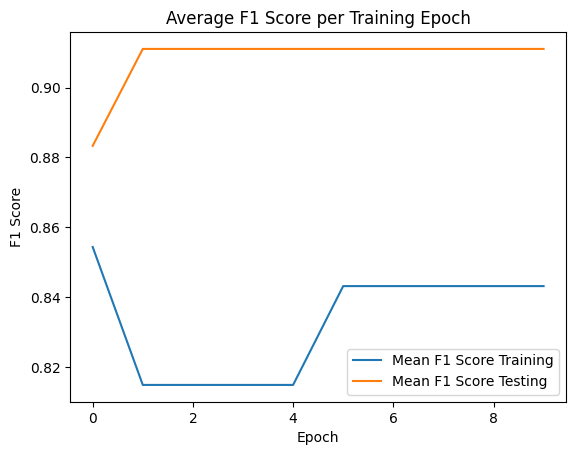

In [35]:
f1s_formatted = pd.DataFrame({
    "Mean F1 Score Training" : f1_train,
    "Mean F1 Score Testing" : f1_test
})
plot = f1s_formatted.plot(xlabel="Epoch", ylabel="F1 Score", title="Average F1 Score per Training Epoch")

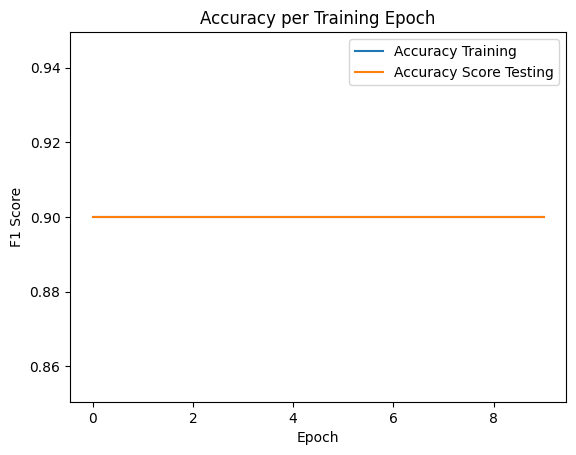

In [36]:
ac_formatted = pd.DataFrame({
    "Accuracy Training" : ac_train,
    "Accuracy Score Testing" : ac_test
})
plot = ac_formatted.plot(xlabel="Epoch", ylabel="F1 Score", title="Accuracy per Training Epoch")

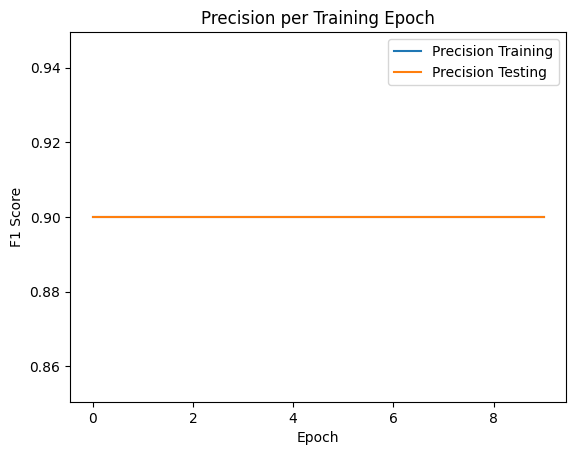

In [37]:
prec_formatted = pd.DataFrame({
    "Precision Training" : prec_train,
    "Precision Testing" : prec_test
})
plot = prec_formatted.plot(xlabel="Epoch", ylabel="F1 Score", title="Precision per Training Epoch")

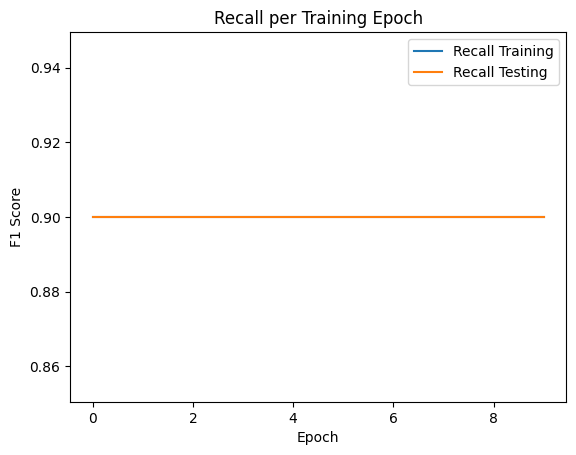

In [38]:
recall_formatted = pd.DataFrame({
    "Recall Training" : recall_train,
    "Recall Testing" : recall_test
})
plot = recall_formatted.plot(xlabel="Epoch", ylabel="F1 Score", title="Recall per Training Epoch")